In [5]:
import numpy as np
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


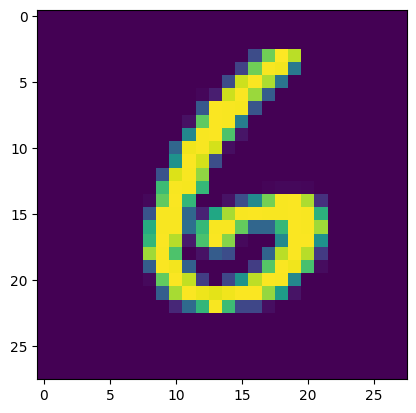

In [8]:
plt.imshow(x_train[6000])

In [9]:
np.argmax(y_train[6000])

0

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [11]:
number_of_classes = 10

In [12]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [16]:
model = Sequential(
    [
        Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        Flatten(),
        Dense(number_of_classes, activation='softmax'),
    ]
)


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [20]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.2426 - accuracy: 0.9518 - val_loss: 0.1186 - val_accuracy: 0.9618
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0868 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0805 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.1005 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0930 - val_accuracy: 0.9793


In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

Test Loss: 0.09303579479455948
Test Accuracy: 0.9793000221252441


1/1 [==============================] - 0s 22ms/step
[[6.7545162e-18 2.8610804e-17 2.8385476e-15 1.1870608e-06 2.0631321e-04
  2.8680463e-06 1.2851198e-19 1.2648114e-09 9.2938862e-10 9.9978966e-01]]


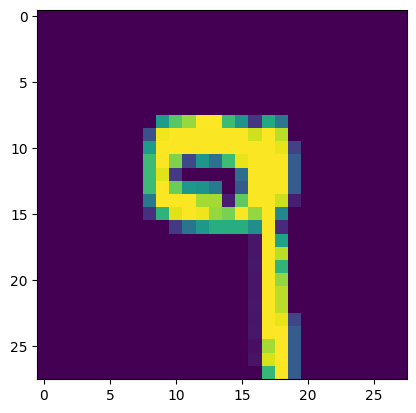

In [27]:
prediction = model.predict(x_test[6000:6001])
print(prediction)
plt.imshow(x_test[6000])

In [28]:
print(f'Model\'s Prediction: {np.argmax(prediction, axis = 1)}\nActual Label: {np.argmax(y_test[6000:6001])}')

Model's Prediction: [9]
Actual Label: 9


In [29]:
model.save('models/main.h5')